In [37]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load CSV file containing URLs
data = pd.read_csv('dataset/dataset.csv',encoding= 'unicode_escape')
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Url'])
y = np.array(data['Label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Train random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=5)

# Calculate the performance metrics and display them
report = classification_report(y_test, y_pred)
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred, normalize='true')

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm*100, annot=True, cmap='Blues', fmt='g', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Print the Accuracy
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Save the model using pickle library
with open('vector/vector.pickle','wb') as file:
    pickle.dump(vectorizer, file)
with open('classifier/random_forest.pkl','wb') as file:
    pickle.dump(model, file)

  (0, 24905)	0.0474637850365411
  (0, 29239)	0.17237619237577756
  (0, 17780)	0.0473435526633286
  (0, 13493)	0.1660694191919901
  (0, 2639)	0.3134619458437675
  (0, 28981)	0.245556906575146
  (0, 28657)	0.3012320234031567
  (0, 29845)	0.3134619458437675
  (0, 39489)	0.11461858754100512
  (0, 14310)	0.2716475648346139
  (0, 22193)	0.23979416477380422
  (0, 38164)	0.225454102408431
  (0, 13770)	0.3012320234031567
  (0, 15854)	0.28032483289857985
  (0, 26603)	0.2547680416743478
  (0, 22639)	0.14602820299983224
  (0, 22812)	0.25700333821046595
  (0, 23772)	0.2716475648346139
Accuracy: 0.94 (+/- 0.02)


In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3550
           1       0.93      0.97      0.95      3648

    accuracy                           0.95      7198
   macro avg       0.95      0.95      0.95      7198
weighted avg       0.95      0.95      0.95      7198



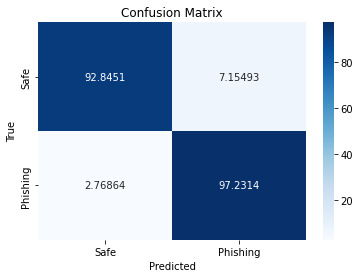

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred, normalize='true')

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm*100, annot=True, cmap='Blues', fmt='g', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()